In [1]:
import numpy as np
import pandas as pd
import re

In [2]:
df = pd.read_csv('census-income.csv')

### **Data Wrangling and cleaning**

In [3]:
def unique_vals():

    for i in df.columns:

        if df[i].dtype == 'object':
            print(i)
            print(df[i].unique(), '\n')

In [4]:
unique_vals()

workclass
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked'] 

education
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th'] 

marital-status
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed'] 

occupation
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv'] 

relationship
['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative'] 

race
['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other'] 

sex
['Male' 'Female'] 

native-country
['United-States' 'Cuba' 'Jamaica' 'India' '?' 'Mexico' 'South'
 'Puerto-Rico' 'Honduras' 'Engl

In [5]:
df.workclass = df.workclass.replace('?', None)
df.occupation = df.occupation.replace('?', None)
df['native-country'] = df['native-country'].replace('?', None)
df.annual_income = df.annual_income.replace(["<=50K", ">50K"], [0, 1])

C:\Users\jayak\AppData\Local\Temp\ipykernel_25460\3937359524.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.annual_income = df.annual_income.replace(["<=50K", ">50K"], [0, 1])


In [6]:
df.workclass.fillna(method = 'bfill', inplace = True)
df.occupation.fillna(method = 'bfill', inplace = True)
df['native-country'].fillna(method = 'bfill', inplace = True)

C:\Users\jayak\AppData\Local\Temp\ipykernel_25460\2523564330.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.workclass.fillna(method = 'bfill', inplace = True)
C:\Users\jayak\AppData\Local\Temp\ipykernel_25460\2523564330.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.workclass.fillna(method = 'bfill', inplace = True)
C:\Users\jayak\AppData\Local\Temp\ipykernel_25460\2523564330.py:2: FutureWarning: A value is trying to be set

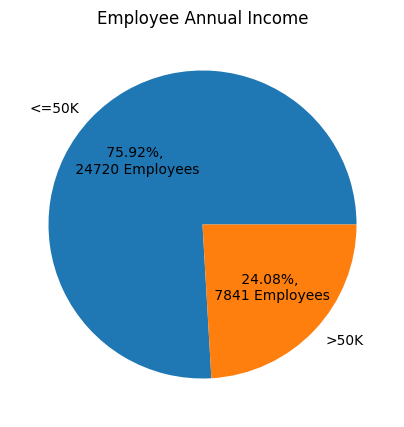

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,5))

plt.pie(df.annual_income.value_counts(), 
        autopct=lambda p:f'{p: .2f}%, \n {p*sum(df.annual_income.value_counts().values)/100 :.0f} Employees',
        frame = False, labels = ['<=50K', ">50K"])
plt.title('Employee Annual Income')
plt.show()

In [8]:
q1 = df.age.quantile(0.25)
q3 = df.age.quantile(0.75)

iqr = q3 - q1

lf = q1 - iqr * 1.5
uf = q3 + iqr * 1.5

df.age = df.age[(df.age >= lf) & (df.age <= uf)]

In [9]:
df.age = df.age.fillna(method = 'bfill')

C:\Users\jayak\AppData\Local\Temp\ipykernel_25460\1809187407.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.age = df.age.fillna(method = 'bfill')


In [10]:
df2 = df.copy()

In [11]:
df2.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


### **Feature Selection**

In [12]:
df2.drop(columns=['education'], axis=1, inplace=True)

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in df2.columns:
    if df2[i].dtype == 'object':
        df2[i] = le.fit_transform(df2[i])

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import *

In [15]:
X = df2.drop(columns = ['annual_income'])
y = df2.annual_income

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

sm = SMOTE(random_state=42)

X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

C:\Users\jayak\AppData\Local\Temp\ipykernel_25460\320546416.py:5: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())


**Logistic Regression**

In [17]:
log_r = LogisticRegression()
log_r.fit(X_train_res, y_train_res.ravel())

c:\Anaconda\envs\ml\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
log_r_predict = log_r.predict(X_test)

In [22]:
print(classification_report(y_test, log_r_predict))

              precision    recall  f1-score   support

           0       0.87      0.75      0.81      7455
           1       0.44      0.63      0.52      2314

    accuracy                           0.72      9769
   macro avg       0.66      0.69      0.66      9769
weighted avg       0.77      0.72      0.74      9769



<Axes: >

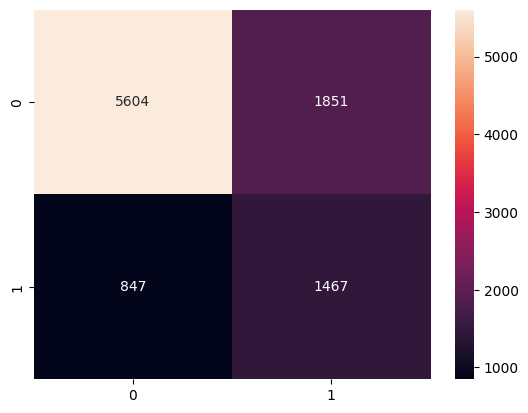

In [23]:
cm = confusion_matrix(y_test, log_r_predict)
sns.heatmap(cm, annot=True, fmt='.0f')

**Decision Tree Classifier**

In [24]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train_res, y_train_res)

DecisionTreeClassifier()

In [25]:
dtc_predict = dtc.predict(X_test)

In [26]:
print(classification_report(y_test, dtc_predict))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86      7455
           1       0.54      0.66      0.59      2314

    accuracy                           0.79      9769
   macro avg       0.71      0.74      0.73      9769
weighted avg       0.80      0.79      0.79      9769



<Axes: >

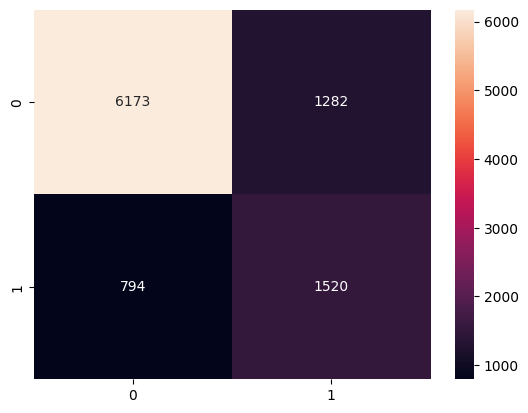

In [27]:
cm = confusion_matrix(y_test, dtc_predict)
sns.heatmap(cm, annot=True, fmt='.0f')

In [28]:
param = {
        'criterion': ['entropy', 'gini'],
        'max_features': ['log2', 'sqrt', 'auto'],
        'max_depth': [2,3,5,10,50],
        'min_samples_split': [2,3,50,100],
        'min_samples_leaf': [1,3,5,8,10]
}

In [29]:
grid_obj = GridSearchCV(dtc, param_grid=param)
grid_obj = grid_obj.fit(X_train_res, y_train_res.ravel())
dtc_gs = grid_obj.best_estimator_
dtc_gs.fit(X_train_res, y_train_res.ravel())

c:\Anaconda\envs\ml\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
1000 fits failed out of a total of 3000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1000 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Anaconda\envs\ml\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Anaconda\envs\ml\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Anaconda\envs\ml\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Anaconda\envs\ml\Lib\site-packages\sklearn\utils\_para

DecisionTreeClassifier(criterion='entropy', max_depth=50, max_features='log2',
                       min_samples_split=100)

In [30]:
dtc_gs_p  = dtc_gs.predict(X_test)

In [31]:
print(classification_report(y_test, dtc_gs_p))

              precision    recall  f1-score   support

           0       0.91      0.84      0.87      7455
           1       0.59      0.72      0.65      2314

    accuracy                           0.81      9769
   macro avg       0.75      0.78      0.76      9769
weighted avg       0.83      0.81      0.82      9769



<Axes: >

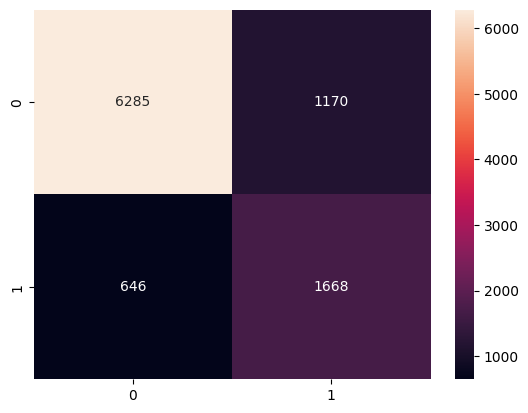

In [32]:
cm = confusion_matrix(y_test, dtc_gs_p)
sns.heatmap(cm, annot=True, fmt='.0f')

**Random Forest Classifier**

In [33]:
rfc = RandomForestClassifier(n_estimators=150)
rfc.fit(X_train_res, y_train_res.ravel())

RandomForestClassifier(n_estimators=150)

In [34]:
rfc_p = rfc.predict(X_test)

In [35]:
print(classification_report(y_test, rfc_p))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89      7455
           1       0.64      0.72      0.68      2314

    accuracy                           0.84      9769
   macro avg       0.78      0.80      0.79      9769
weighted avg       0.85      0.84      0.84      9769



<Axes: >

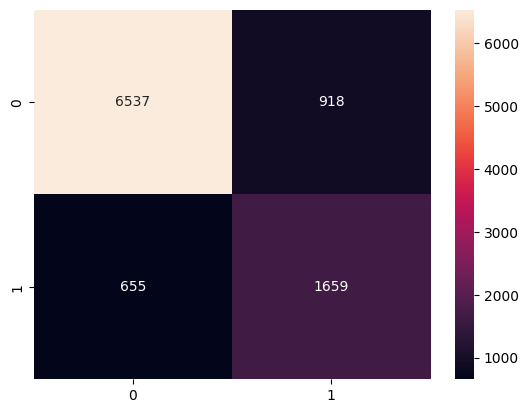

In [36]:
cm = confusion_matrix(y_test, rfc_p)
sns.heatmap(cm, annot=True, fmt='.0f')

In [37]:
grid_obj_rfc = GridSearchCV(rfc, param)
grid_obj_rfc = grid_obj_rfc.fit(X_train_res, y_train_res.ravel())
rfc_gs = grid_obj_rfc.best_estimator_
rfc_gs.fit(X_train_res, y_train_res.ravel())

c:\Anaconda\envs\ml\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
1000 fits failed out of a total of 3000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1000 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Anaconda\envs\ml\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Anaconda\envs\ml\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Anaconda\envs\ml\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Anaconda\envs\ml\Lib\site-packages\sklearn\utils\_para

RandomForestClassifier(max_depth=50, max_features='log2', min_samples_split=3,
                       n_estimators=150)

In [38]:
rfc_gs_p = rfc_gs.predict(X_test)

In [39]:
print(classification_report(y_test, rfc_gs_p))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89      7455
           1       0.65      0.72      0.68      2314

    accuracy                           0.84      9769
   macro avg       0.78      0.80      0.79      9769
weighted avg       0.85      0.84      0.84      9769



<Axes: >

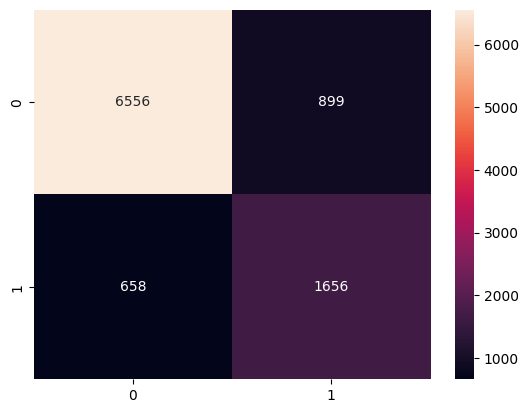

In [40]:
cm = confusion_matrix(y_test, rfc_gs_p)
sns.heatmap(cm, annot=True, fmt='.0f')

**Gradient Boosting Classifier**

In [41]:
gbc = GradientBoostingClassifier(n_estimators=150)
gbc.fit(X_train_res, y_train_res.ravel())

GradientBoostingClassifier(n_estimators=150)

In [42]:
gbc_p = gbc.predict(X_test)

In [43]:
print(classification_report(y_test, gbc_p))

              precision    recall  f1-score   support

           0       0.92      0.87      0.89      7455
           1       0.64      0.76      0.69      2314

    accuracy                           0.84      9769
   macro avg       0.78      0.81      0.79      9769
weighted avg       0.85      0.84      0.84      9769



<Axes: >

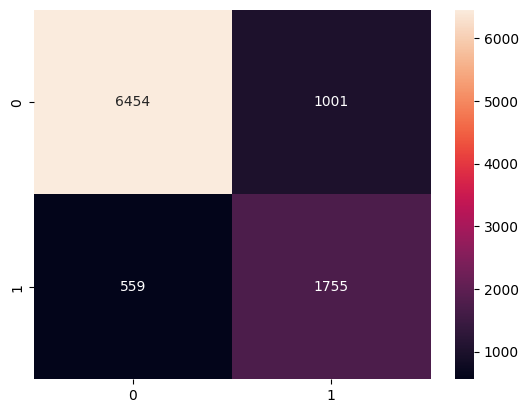

In [45]:
cm = confusion_matrix(y_test, gbc_p)
sns.heatmap(cm, annot=True, fmt='.0f')

In [46]:
gbc_param = {
                'n_estimators': [50, 100, 120],
                'criterion': ['mse', 'friedman_mse'],
                'learning_rate': [0.1, 0.2, 0.3, 0.4],
                'max_features': ['log2', 'sqrt', 'auto'],
                'min_samples_split': [2, 3, 50, 100],
                'min_samples_leaf': [1, 3, 5, 8, 10]
}

grid_obj_gs = GridSearchCV(gbc, gbc_param)
grid_obj_gs = grid_obj_gs.fit(X_train_res, y_train_res.ravel())
gbc_gs = grid_obj_gs.best_estimator_
gbc_gs.fit(X_train_res, y_train_res.ravel())

c:\Anaconda\envs\ml\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
4800 fits failed out of a total of 7200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3600 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Anaconda\envs\ml\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Anaconda\envs\ml\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Anaconda\envs\ml\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Anaconda\envs\ml\Lib\site-packages\sklearn\utils\_para

GradientBoostingClassifier(learning_rate=0.4, max_features='log2',
                           min_samples_leaf=3, min_samples_split=3,
                           n_estimators=120)

In [47]:
gbc_gs_p = gbc_gs.predict(X_test)

In [48]:
print(classification_report(y_test, gbc_gs_p))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89      7455
           1       0.63      0.74      0.68      2314

    accuracy                           0.84      9769
   macro avg       0.77      0.80      0.79      9769
weighted avg       0.85      0.84      0.84      9769



<Axes: >

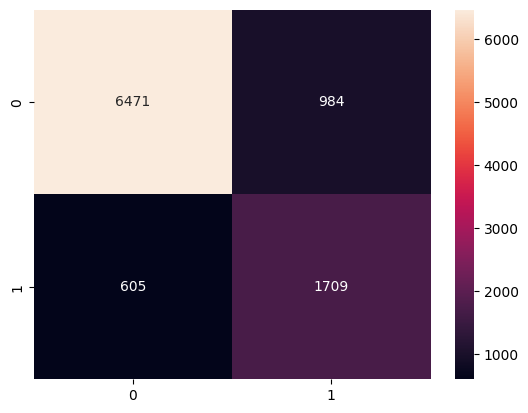

In [49]:
cm = confusion_matrix(y_test, gbc_gs_p)
sns.heatmap(cm, annot=True, fmt='.0f')

In [50]:
import pickle

file = 'gbc_model.pkl'

pickle.dump(gbc_gs, open(file, 'wb'))

In [51]:
# Loading the saved model
predict_model = pickle.load(open('gbc_model.pkl', 'rb'))

In [52]:
df2.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39.0,6,77516,13,4,0,1,4,1,2174,0,40,38,0
1,50.0,5,83311,13,2,3,0,4,1,0,0,13,38,0
2,38.0,3,215646,9,0,5,1,4,1,0,0,40,38,0
3,53.0,3,234721,7,2,5,0,2,1,0,0,40,38,0
4,28.0,3,338409,13,2,9,5,2,0,0,0,40,4,0


In [54]:
dfm = df.copy()

In [55]:
dfm.drop(columns=['education'], axis=1, inplace=True)

In [56]:
dfm.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39.0,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50.0,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38.0,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53.0,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28.0,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [57]:
for i, j in zip(dfm.columns, df2.columns):

    if dfm[i].dtype == 'object':
        label = df2[j].value_counts().keys().tolist()
        category = dfm[i].value_counts().keys().tolist()
        print(f"{i} category")
        print(dict(sorted(dict(zip(label, category)).items())))
        print("\n")

workclass category
{0: 'Federal-gov', 1: 'Local-gov', 2: 'Never-worked', 3: 'Private', 4: 'Self-emp-inc', 5: 'Self-emp-not-inc', 6: 'State-gov', 7: 'Without-pay'}


marital-status category
{0: 'Divorced', 1: 'Married-AF-spouse', 2: 'Married-civ-spouse', 3: 'Married-spouse-absent', 4: 'Never-married', 5: 'Separated', 6: 'Widowed'}


occupation category
{0: 'Adm-clerical', 1: 'Armed-Forces', 2: 'Craft-repair', 3: 'Exec-managerial', 4: 'Farming-fishing', 5: 'Handlers-cleaners', 6: 'Machine-op-inspct', 7: 'Other-service', 8: 'Priv-house-serv', 9: 'Prof-specialty', 10: 'Protective-serv', 11: 'Sales', 12: 'Tech-support', 13: 'Transport-moving'}


relationship category
{0: 'Husband', 1: 'Not-in-family', 2: 'Other-relative', 3: 'Own-child', 4: 'Unmarried', 5: 'Wife'}


race category
{0: 'Amer-Indian-Eskimo', 1: 'Asian-Pac-Islander', 2: 'Black', 3: 'Other', 4: 'White'}


sex category
{0: 'Female', 1: 'Male'}


native-country category
{0: 'Cambodia', 1: 'Canada', 2: 'China', 3: 'Columbia', 4: 'C

In [67]:
ed_category = df.education.value_counts().keys().tolist()
ed_label = df['education-num'].value_counts().keys().tolist()
print(dict(sorted(dict(zip(ed_label, ed_category)).items())))

{1: 'Preschool', 2: '1st-4th', 3: '5th-6th', 4: '7th-8th', 5: '9th', 6: '10th', 7: '11th', 8: '12th', 9: 'HS-grad', 10: 'Some-college', 11: 'Assoc-voc', 12: 'Assoc-acdm', 13: 'Bachelors', 14: 'Masters', 15: 'Prof-school', 16: 'Doctorate'}


In [70]:
input = np.array(df2.iloc[-1, :-1]).reshape(1,-1)

In [71]:
predict_model.predict(input)

c:\Anaconda\envs\ml\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [73]:
print(dfm.iloc[-1, :-1].to_list())

[52.0, 'Self-emp-inc', 287927, 9, 'Married-civ-spouse', 'Exec-managerial', 'Wife', 'White', 'Female', 15024, 0, 40, 'United-States']
